In [1]:
# init
import re
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button, RadioButtons

%matplotlib qt

plt.rcParams['animation.ffmpeg_path'] = 'C:/Program Files/ffmpeg/bin/ffmpeg.exe'


visualisation_folder = "Visualisation/6_30052019_1"
vis_regexp = 'vis_(\d\d\d\d).npy'

In [2]:
# read actual file list
vis_regexp = re.compile(vis_regexp)
visualizations = os.listdir(visualisation_folder)
vis_list = filter(lambda s: vis_regexp.match(s) != None, visualizations)
vis_list = map(lambda f: np.loadtxt(os.path.join(visualisation_folder, f)), vis_list)
vis_list = list(vis_list)

In [7]:
# https://matplotlib.org/users/pyplot_tutorial.html



N = 0
vis = vis_list[N]
id_train_benign = np.where(vis[:,0] == 0)
id_train_malignant = np.where(vis[:,0] == 1)
id_validation_benign = np.where(vis[:,0] == 2)
id_validation_malignant = np.where(vis[:,0] == 3)


fig, ax = plt.subplots()
ax.clear()
fig.clear()
sp1 = fig.add_subplot(1, 1, 1)
plt.subplots_adjust(left=0.25, bottom=0.25)


# https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html
sp1.plot(vis[id_train_benign,1], vis[id_train_benign,2], 'b.')
sp1.plot(vis[id_train_malignant,1], vis[id_train_malignant,2], 'r.')
sp1.plot(vis[id_validation_benign,1], vis[id_validation_benign,2], 'b+')
sp1.plot(vis[id_validation_malignant,1], vis[id_validation_malignant,2], 'r+')


axcolor = 'lightgoldenrodyellow'
axepoch = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
prevax = plt.axes([0.7, 0.025, 0.1, 0.04])
nextax = plt.axes([0.8, 0.025, 0.1, 0.04])

sepoch = Slider(axepoch, 'Epoch', 1, len(vis_list), valinit=N, valstep=1)
bprev = Button(prevax, '<-', color=axcolor, hovercolor='0.975')
bnext = Button(nextax, '->', color=axcolor, hovercolor='0.975')


def update(val):
    N = int(sepoch.val) - 1
    vis = vis_list[N]
    id_train_benign = np.where(vis[:,0] == 0)
    id_train_malignant = np.where(vis[:,0] == 1)
    id_validation_benign = np.where(vis[:,0] == 2)
    id_validation_malignant = np.where(vis[:,0] == 3)
    
    sp1.clear()
    
    sp1.plot(vis[id_train_benign,1], vis[id_train_benign,2], 'b.')
    sp1.plot(vis[id_train_malignant,1], vis[id_train_malignant,2], 'r.')
    sp1.plot(vis[id_validation_benign,1], vis[id_validation_benign,2], 'b+')
    sp1.plot(vis[id_validation_malignant,1], vis[id_validation_malignant,2], 'r+')
    

def _prev(val):
    N = int(sepoch.val)
    if (N > 1):
        N -= 1
    sepoch.set_val(N)
    update(val)
    
def _next(val):
    N = int(sepoch.val)
    if (N < len(vis_list)):
        N += 1
    sepoch.set_val(N)
    update(val)
bprev.on_clicked(_prev)
bnext.on_clicked(_next)
    

    
sepoch.on_changed(update)

plt.show()

pass

In [6]:
# make animation
# https://matplotlib.org/2.1.2/gallery/animation/basic_example.html
# https://mikulskibartosz.name/interactive-plots-in-jupyter-notebook-55b32b8d143
# https://stackoverflow.com/questions/25111040/how-to-change-color-of-plotted-curves-when-using-animations-in-python-matplotlib

%matplotlib qt

fig1 = plt.figure()
ax1 = fig1.add_subplot(1,1,1)   


#l, = plt.plot([], [], 'r-')
#plt.xlim(0, 1)
#plt.ylim(0, 1)
#plt.xlabel('x')
#plt.title('test')


def update(num):
    ax1.clear()
    
    vis = vis_list[num]
    id_train_benign = np.where(vis[:,0] == 0)
    id_train_malignant = np.where(vis[:,0] == 1)
    
    
    plt.title('Epoch #{}'.format(num + 1))
    plt.xlabel('x')
    plt.ylabel('y')

    ax1.plot(vis[id_train_benign,1], vis[id_train_benign,2], 'b.')
    ax1.plot(vis[id_train_malignant,1], vis[id_train_malignant,2], 'r.')
    ax1.plot(vis[id_validation_benign,1], vis[id_validation_benign,2], 'b+')
    ax1.plot(vis[id_validation_malignant,1], vis[id_validation_malignant,2], 'r+')

line_ani = animation.FuncAnimation(fig1, update, len(vis_list), interval=300, blit=False)

#plt.show()
# To save the animation, use the command: line_ani.save('lines.mp4')

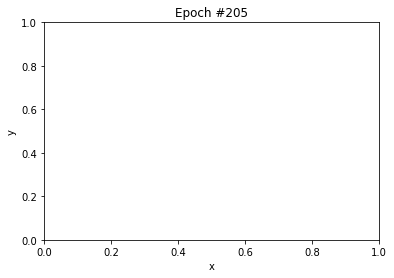

In [74]:
# https://matplotlib.org/2.1.2/gallery/animation/basic_example_writer_sgskip.html
# https://stackoverflow.com/questions/23856990/cant-save-matplotlib-animation
Writer = animation.writers['ffmpeg']
writer = Writer(fps=3, metadata=dict(artist='Kry127'), bitrate=1800)

line_ani.save('dataset.mp4', writer=writer)